In [1]:
#Import the standard libraries used for data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load cleaned Titanic dataset

fname = "titanic_cleaned_1807.csv" # ? "titanic_cleaned_1807.csv"
#df = pd.read_csv(fname) 
# To remove the index column saved as the first column in the dataset while saving dataframe using to_csv()
df = pd.read_csv(fname,usecols=range(1,12)) 

In [3]:
df.head()

,Survived,Age,Fare,Family_Cnt,New_fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Cabin_ind_1
0,0,22.0,7.2500,1,7.2500,1,0,1,0,1,0
1,1,38.0,71.2833,1,71.2833,0,0,0,0,0,1
2,1,26.0,7.9250,0,7.9250,0,0,1,0,1,0
3,1,35.0,53.1000,1,53.1000,0,0,0,0,1,1
4,0,35.0,8.0500,0,8.0500,1,0,1,0,1,0


In [4]:
df.shape 

(891, 11)

In [5]:
df.isnull().sum()

Survived       0
Age            0
Fare           0
Family_Cnt     0
New_fare       0
Sex_male       0
Pclass_2       0
Pclass_3       0
Embarked_Q     0
Embarked_S     0
Cabin_ind_1    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   Family_Cnt   891 non-null    int64  
 4   New_fare     891 non-null    float64
 5   Sex_male     891 non-null    int64  
 6   Pclass_2     891 non-null    int64  
 7   Pclass_3     891 non-null    int64  
 8   Embarked_Q   891 non-null    int64  
 9   Embarked_S   891 non-null    int64  
 10  Cabin_ind_1  891 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 76.7 KB


In [7]:
#Select only required columns and separate dependent & independent variables

cols_needed = ['Age','Family_Cnt','New_fare','Sex_male','Pclass_2','Pclass_3','Embarked_Q','Embarked_S','Cabin_ind_1']

X = df[cols_needed] # independent variables 

Y = df['Survived'] # dependent variable

In [8]:
X.head()

,Age,Family_Cnt,New_fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Cabin_ind_1
0,22.0,1,7.2500,1,0,1,0,1,0
1,38.0,1,71.2833,0,0,0,0,0,1
2,26.0,0,7.9250,0,0,1,0,1,0
3,35.0,1,53.1000,0,0,0,0,1,1
4,35.0,0,8.0500,1,0,1,0,1,0


In [9]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
#Check for multi-collinearity among independent variables
cormat = X.corr()
round(cormat,2)

,Age,Family_Cnt,New_fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Cabin_ind_1
Age,1.00,-0.25,0.13,0.08,0.01,-0.28,-0.01,-0.02,0.23
Family_Cnt,-0.25,1.00,0.30,-0.20,-0.04,0.07,-0.06,0.08,-0.01
New_fare,0.13,0.30,1.00,-0.24,-0.12,-0.54,-0.15,-0.15,0.61
Sex_male,0.08,-0.20,-0.24,1.00,-0.06,0.14,-0.07,0.12,-0.14
Pclass_2,0.01,-0.04,-0.12,-0.06,1.00,-0.57,-0.13,0.19,-0.17
Pclass_3,-0.28,0.07,-0.54,0.14,-0.57,1.00,0.24,-0.02,-0.54
Embarked_Q,-0.01,-0.06,-0.15,-0.07,-0.13,0.24,1.00,-0.50,-0.13
Embarked_S,-0.02,0.08,-0.15,0.12,0.19,-0.02,-0.50,1.00,-0.10
Cabin_ind_1,0.23,-0.01,0.61,-0.14,-0.17,-0.54,-0.13,-0.10,1.00


In [11]:
# 'import' - imports an entire code library, 'from import' - imports a specific member or members of the library.

# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split 

X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X, Y, test_size=0.2, random_state=420) # test_size= 0.2 for 80-20 split of dataset

In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [13]:
#Check the shape of train and test data

print(X_train_data.shape)
print(X_test_data.shape)
print(Y_train_data.shape)
print(Y_test_data.shape)

# To check if there exists a class imbalance
#Y_train_data.value_counts()
#Y_test_data.value_counts()


(712, 9)
(179, 9)
(712,)
(179,)


# Steps while using sklearn for modeling

In [15]:
# Import the Logistic Regression model from the sklearn (also known as Scikit-learn) library  

from sklearn.linear_model import LogisticRegression

In [16]:
# Instantiate the model

lr_model = LogisticRegression() # by default max_iter=100

In [17]:
# Fit logistic regression

lr_model.fit(X_train_data,Y_train_data)

LogisticRegression()

In [18]:
# Predict using the model for test data

predictions = lr_model.predict(X_test_data)

In [19]:
# Check how the predictions look (the output of lr is a probability that is converted to binary classification using a cutoff)

predictions

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [20]:
# Output of logistic regression - predicted probability between 0 and 1

lr_model.predict_proba(X_test_data)

array([[0.78083727, 0.21916273],
       [0.71038884, 0.28961116],
       [0.31804384, 0.68195616],
       [0.87661338, 0.12338662],
       [0.21239508, 0.78760492],
       [0.07986437, 0.92013563],
       [0.13398405, 0.86601595],
       [0.94552035, 0.05447965],
       [0.66321596, 0.33678404],
       [0.84163142, 0.15836858],
       [0.1378373 , 0.8621627 ],
       [0.3804325 , 0.6195675 ],
       [0.2809611 , 0.7190389 ],
       [0.92390609, 0.07609391],
       [0.85192763, 0.14807237],
       [0.98055169, 0.01944831],
       [0.87961434, 0.12038566],
       [0.85192763, 0.14807237],
       [0.16213178, 0.83786822],
       [0.68377963, 0.31622037],
       [0.93952586, 0.06047414],
       [0.85484246, 0.14515754],
       [0.58294745, 0.41705255],
       [0.40291178, 0.59708822],
       [0.72885475, 0.27114525],
       [0.94316678, 0.05683322],
       [0.90663499, 0.09336501],
       [0.89731462, 0.10268538],
       [0.85010989, 0.14989011],
       [0.9450518 , 0.0549482 ],
       [0.

In [21]:
# Evaluate the model - check the accuracy of the model

print('training accuracy:', round(lr_model.score(X_train_data, Y_train_data),2))
print('test accuracy:',round(lr_model.score(X_test_data, Y_test_data),2))

training accuracy: 0.81
test accuracy: 0.83


# Profiles

Independent Variables (Predictors):
Age 	Family_Cnt 	New_fare 	Sex_male 	Pclass_2 	Pclass_3 	Embarked_Q 	Embarked_S 	Cabin_ind_1

Profile 1: Jack, a “20 year old” “third class” “male” passenger, won a hand of poker and his ticket to the land of the free.
jack_data = [20,0,0,1,0,1,0,1,0]

Profile 2: my_data = [36,2,0,1,1,0,0,1,0]



In [22]:
# define a single row of input data
jack_data = [20,0,0,1,0,1,0,1,0]
# predict the class label
jack = lr_model.predict([jack_data])
# summarize the predicted class
print('Jack - Survived: %d' % jack[0])

Jack - Survived: 0


In [23]:
my_data = [36,2,0,1,1,0,0,1,0]
me = lr_model.predict([my_data])

print('Saikat - Survived: %d' % me[0])

Saikat - Survived: 0


In [24]:
modified_data = [36,2,0,0,1,0,0,1,0]
not_me = lr_model.predict([modified_data])

print('After tweaking data - Survived: %d' % not_me[0])

After tweaking data - Survived: 1


# Further analysis

In [25]:
# Accuracy Score
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test_data, predictions))

0.8324022346368715


In [26]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_data, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[96  9]
 [21 53]]


In [34]:
#!pip install dmba # to install a package in jupyter otherwise can install in Anaconda shell 

from dmba import classificationSummary # another method to generate the confusion matrix, accuracy
classificationSummary(Y_test_data, predictions, class_names = ['not-survived','survived'])

Confusion Matrix (Accuracy 0.8324)

             Prediction
      Actual not-survived     survived
not-survived           96            9
    survived           21           53


<AxesSubplot:>

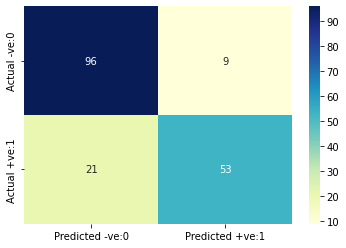

In [27]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'], 
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [28]:
# Accuracy = (TP+TN)/(Total) (manually calculated is same as obtained from lr_model.score)

(96+53)/(96+9+21+53)

0.8324022346368715

# Precision & Recall: When One Class is More Important

In many cases, it is more important to identify members of one class, e.g.,
Tax fraud
Credit default
Response to a promotional offer
Predicting delayed flights
However data has class imbalance.

In such cases, we will either increase or decrease the cut-off to better identify the important class for further attention

We may be willing to tolerate greater overall error in return for better identifying the important class.

Recall – we don’t want to miss anyone (false classifying is fine), trying to reduce false negative (false positive increases as a consequence)

Precision - we want to reduce false positive by changing the cut-off as a consequence the false negative increases.

There is always a trade-off between Precision and Recall


In [32]:
# Precision = TP/(TP+FP)
# True positive/ Predicted positive

print(53/(53+9))

0.8548387096774194


In [33]:
# Recall = TP/(TP+FN)
# True positive/ Actual positive

print(53/(53+21))

0.7162162162162162


In [ ]:
prediction_prob = lr_model.predict_proba(X_test_data)
prediction_prob

In [35]:
#Try different cut-off (say 0.8) and check precision and recall (by default cut-off is 0.5)

prediction_prob = lr_model.predict_proba(X_test_data)[:,1] # take the second column which is the probability for survived (i.e., 1, column 0 is the probability for not survived (i.e., 0)


#as cut-off i.e., predictions_threshold is increased from 0.5 to 0.8, precision increase (since as threshold increases FP of survived in denominator is less), however recall decrease

prediction_prob[prediction_prob > 0.8] = 1 
prediction_prob[prediction_prob <= 0.8] = 0



In [36]:
classificationSummary(Y_test_data, prediction_prob, class_names = ['not-survived','survived'])

Confusion Matrix (Accuracy 0.7151)

             Prediction
      Actual not-survived     survived
not-survived          104            1
    survived           50           24


In [37]:
# Precision = TP/(TP+FP)
# True positive/ Predicted positive

print(24/(24+1))

0.96


In [38]:
# Recall = TP/(TP+FN)
# True positive/ Actual positive

print(24/(24+50))

0.32432432432432434


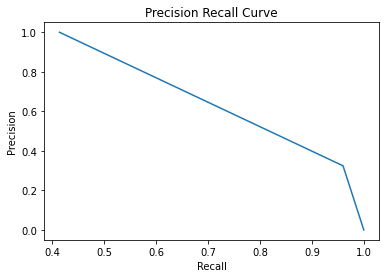

In [39]:
from sklearn.metrics import precision_recall_curve
# Generate precision recall curve values: precision, recall, thresholds/ cut-offs
precision, recall, thresholds = precision_recall_curve(Y_test_data, prediction_prob)

# Plot Precision Recall curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Precision vs Recall

If increased threshold value to 0.8, whether precision, recall will increase?
When threshold increases, the probability of detecting positive is becoming stricter, then predicted positives will become less the denominator of precision goes down, precision will go up and recall will come down

If decreased threshold value to 0.2, whether precision, recall will increase? 
The reverse happens predicted survived increase so denominator of precision becomes more precision will fall and recall will rise
Will increase recall since most people in 1 will be predicted but at same time more people who had died will be predicted as survived.

# ROC Curve

Plotting FPR (false-positive rate) (x-axis as 1- specificity) and TPR (true positive rate) (y-axis as sensitivity)

Whether algorithm has differentiating ability – if don’t have then 45-degree line, area under the curve is an accuracy measure, more than 0.5 for good model

AUC = 0.81 means fairly differentiable model



AUC -  0.8152509652509652


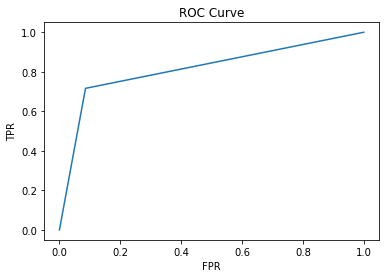

In [40]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test_data, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("AUC - ",format(roc_auc))
# Plot Precision Recall curve
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

# F-score

In [41]:
from sklearn.metrics import classification_report 
print(classification_report(Y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Explore: Alternative library for  Classification using Logistic Regression - Stats Model

# Explore: Alternative Algorithm for Classification using Decision Tree - DecisionTreeClassifier from sklearn.tree